In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Convolution

In [2]:
def convolve(x, h):
    y = np.zeros(x.size + h.size -1)
    for n in range(0, y.size):
        res = 0
        for k in range(0, x.size):
            if n-k < 0 or n-k >= h.size:
                res += 0
            else:
                res += x[k]*h[n-k]
        y[n] = res
    return y

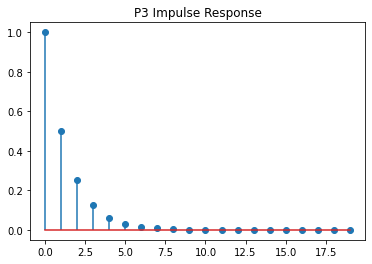

In [3]:
h = np.array([0.5 for _ in range(0, 20)])
h = h ** np.arange(0, 20, 1)
x = np.array([1 for _ in range(0, 5)])
plt.stem(h)
plt.title("P3 Impulse Response")
plt.show()

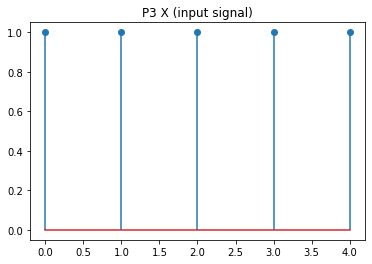

In [4]:
plt.stem(x)
plt.title("P3 X (input signal)")
plt.show()

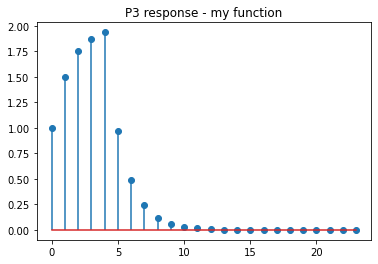

In [5]:
y = convolve(x, h)
plt.stem(y)
plt.title("P3 response - my function")
plt.show()

In [6]:
from scipy import signal

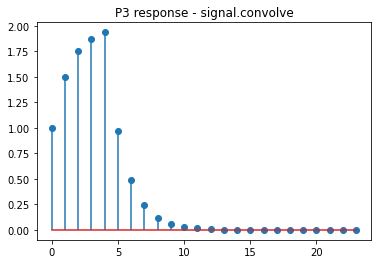

In [7]:
y = signal.convolve(h, x, mode='full')
plt.stem(y)
plt.title("P3 response - signal.convolve")
plt.show()

# Deconvolution

In [8]:
def deconvolve(y, h):
    x = np.zeros(y.size - h.size + 1)
    for n in np.arange(y.size-1, -1, -1):
        res = y[n]
        for k in range(0, h.size-1):
            if n-k < x.size and n-k >= 0:
                res -= x[n-k]*h[k]
        if n-h.size+1 < x.size and n-h.size+1 >= 0 and h[h.size-1] != 0:
                x[n-h.size+1] = res/h[-1]
    return x

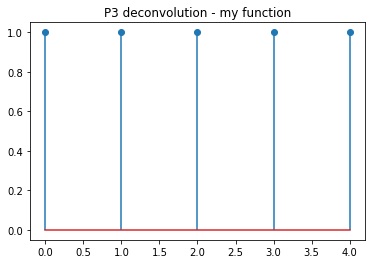

In [9]:
x_ = deconvolve(y, h)
plt.stem(x_)
plt.title("P3 deconvolution - my function")
plt.show()

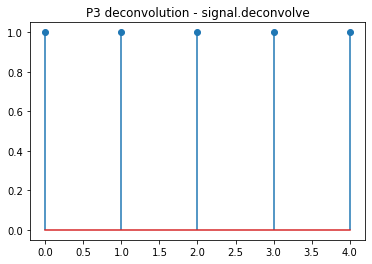

In [10]:
x_ = signal.deconvolve(y, h)
plt.stem(x_[0])
plt.title("P3 deconvolution - signal.deconvolve")
plt.show()